In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import shuffle
from scipy.stats import gmean

# Load your dataset
df = pd.read_csv('weather.csv')

# Define features (x) and target variable (y)
y = df['weather']
columns_to_drop = ['weather', 'date']
x = df.drop(columns=columns_to_drop, axis=1)

# Shuffle the data (optional but recommended)
x, y = shuffle(x, y, random_state=42)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Create Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_classifier.fit(x_train, y_train)

# Make predictions on the training and testing sets
y_rf_train_pred = rf_classifier.predict(x_train)
y_rf_test_pred = rf_classifier.predict(x_test)

# Calculate accuracy
rf_train_accuracy = accuracy_score(y_train, y_rf_train_pred)
rf_test_accuracy = accuracy_score(y_test, y_rf_test_pred)

# Calculate confusion matrix
cm_train_rf = confusion_matrix(y_train, y_rf_train_pred)
cm_test_rf = confusion_matrix(y_test, y_rf_test_pred)

# Calculate precision, recall, F1-score
precision_train_rf = precision_score(y_train, y_rf_train_pred, average='weighted', zero_division=1)
precision_test_rf = precision_score(y_test, y_rf_test_pred, average='weighted', zero_division=1)

recall_train_rf = recall_score(y_train, y_rf_train_pred, average='weighted', zero_division=1)
recall_test_rf = recall_score(y_test, y_rf_test_pred, average='weighted', zero_division=1)

f1_train_rf = f1_score(y_train, y_rf_train_pred, average='weighted', zero_division=1)
f1_test_rf = f1_score(y_test, y_rf_test_pred, average='weighted', zero_division=1)

# Calculate gmean
gmean_train_rf = gmean([recall_train_rf, precision_train_rf])
gmean_test_rf = gmean([recall_test_rf, precision_test_rf])

# Print results
print(f'Training Accuracy (Random Forest): {rf_train_accuracy:.4f}')
print(f'Test Accuracy (Random Forest): {rf_test_accuracy:.4f}')

print(f'Training Precision (Random Forest): {precision_train_rf:.4f}')
print(f'Test Precision (Random Forest): {precision_test_rf:.4f}')

print(f'Training Recall (Random Forest): {recall_train_rf:.4f}')
print(f'Test Recall (Random Forest): {recall_test_rf:.4f}')

print(f'Training F1 Score (Random Forest): {f1_train_rf:.4f}')
print(f'Test F1 Score (Random Forest): {f1_test_rf:.4f}')

print(f'Training G-Mean (Random Forest): {gmean_train_rf:.4f}')
print(f'Test G-Mean (Random Forest): {gmean_test_rf:.4f}')


Training Accuracy (Random Forest): 0.9974
Test Accuracy (Random Forest): 0.8259
Training Precision (Random Forest): 0.9974
Test Precision (Random Forest): 0.8226
Training Recall (Random Forest): 0.9974
Test Recall (Random Forest): 0.8259
Training F1 Score (Random Forest): 0.9974
Test F1 Score (Random Forest): 0.8401
Training G-Mean (Random Forest): 0.9974
Test G-Mean (Random Forest): 0.8243


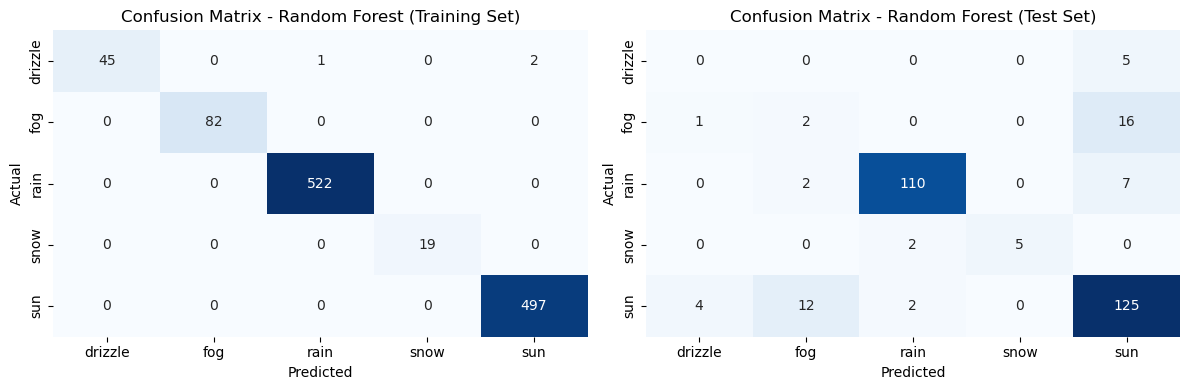

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix for Random Forest - Training Set
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train_rf, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title('Confusion Matrix - Random Forest (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix for Random Forest - Test Set
plt.subplot(1, 2, 2)
sns.heatmap(cm_test_rf, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title('Confusion Matrix - Random Forest (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
